Danny Tipan

# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [80]:
import pandas as pd

In [81]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
documents

['El gato se escondió debajo de la cama.',
 'La cama estaba limpia y cómoda.',
 'El perro y el gato jugaron en el jardín.',
 'La limpieza del jardín es importante.']

In [82]:
documents[0].lower().strip(".")

'el gato se escondió debajo de la cama'

In [83]:
vocab=set()
for doc in documents:
  for word in doc.lower().strip(".").split(sep=" "):
    vocab.add(word)
print(len(vocab))
print(vocab)

20
{'cama', 'perro', 'jardín', 'jugaron', 'la', 'se', 'es', 'y', 'cómoda', 'en', 'el', 'escondió', 'importante', 'estaba', 'debajo', 'gato', 'del', 'limpieza', 'de', 'limpia'}


In [84]:
dict_tf={}
i=0
for doc in documents:
  dict_tfd={}
  for term in vocab:
    count= doc.lower().strip(".").split().count(term)
    dict_tfd[term]=count

  dict_tf[i]=dict_tfd
  i +=1
print(dict_tf)

{0: {'cama': 1, 'perro': 0, 'jardín': 0, 'jugaron': 0, 'la': 1, 'se': 1, 'es': 0, 'y': 0, 'cómoda': 0, 'en': 0, 'el': 1, 'escondió': 1, 'importante': 0, 'estaba': 0, 'debajo': 1, 'gato': 1, 'del': 0, 'limpieza': 0, 'de': 1, 'limpia': 0}, 1: {'cama': 1, 'perro': 0, 'jardín': 0, 'jugaron': 0, 'la': 1, 'se': 0, 'es': 0, 'y': 1, 'cómoda': 1, 'en': 0, 'el': 0, 'escondió': 0, 'importante': 0, 'estaba': 1, 'debajo': 0, 'gato': 0, 'del': 0, 'limpieza': 0, 'de': 0, 'limpia': 1}, 2: {'cama': 0, 'perro': 1, 'jardín': 1, 'jugaron': 1, 'la': 0, 'se': 0, 'es': 0, 'y': 1, 'cómoda': 0, 'en': 1, 'el': 3, 'escondió': 0, 'importante': 0, 'estaba': 0, 'debajo': 0, 'gato': 1, 'del': 0, 'limpieza': 0, 'de': 0, 'limpia': 0}, 3: {'cama': 0, 'perro': 0, 'jardín': 1, 'jugaron': 0, 'la': 1, 'se': 0, 'es': 1, 'y': 0, 'cómoda': 0, 'en': 0, 'el': 0, 'escondió': 0, 'importante': 1, 'estaba': 0, 'debajo': 0, 'gato': 0, 'del': 1, 'limpieza': 1, 'de': 0, 'limpia': 0}}


In [85]:
matriz=pd.DataFrame(dict_tf)
matriz.T

,cama,perro,jardín,jugaron,la,se,es,y,cómoda,en,el,escondió,importante,estaba,debajo,gato,del,limpieza,de,limpia
0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0
1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,1,1,0,0,0,1,0,1,3,0,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0


In [86]:
matriz.to_csv("matriz_tf.csv" ,index=True)

In [87]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Representación TF

# Representación TF-IDF

# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d

# Reducción PCA y visualización 3D

array([[-0.1776916 , -1.59214882],
       [-1.30825867, -0.50070176],
       [ 2.76470134,  0.42989897],
       [-1.27875107,  1.66295161]])

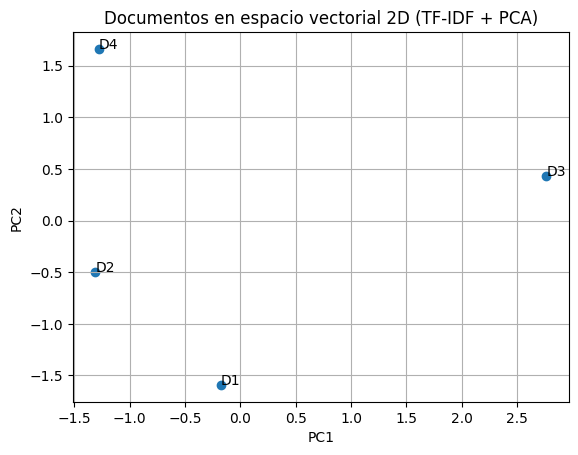

In [88]:
import matplotlib.pyplot as plt
plt.scatter(docs_2d[:,0], docs_2d[:,1])
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizador = TfidfVectorizer()
matriz_tfidf = vectorizador.fit_transform(documents).toarray()


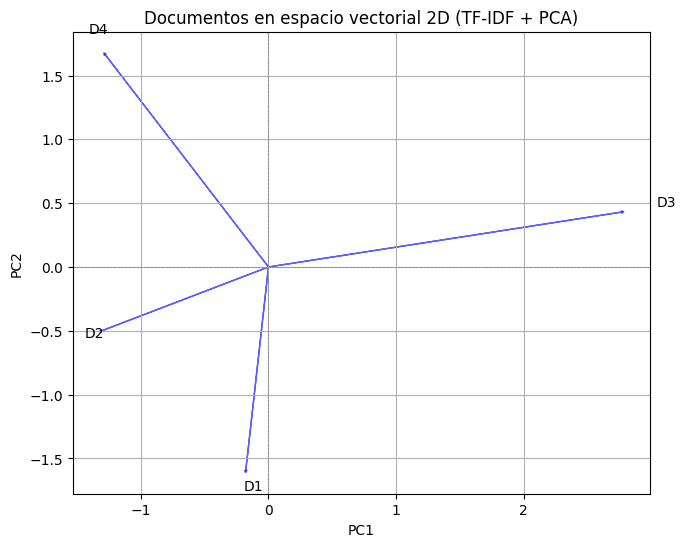

In [90]:
plt.figure(figsize=(10, 6))
for i, (x,y) in enumerate(docs_2d):
  plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
  plt.text(x*1.1, y*1.1, f"D{i+1}", fontsize=10)
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--',linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable="box")
plt.show()

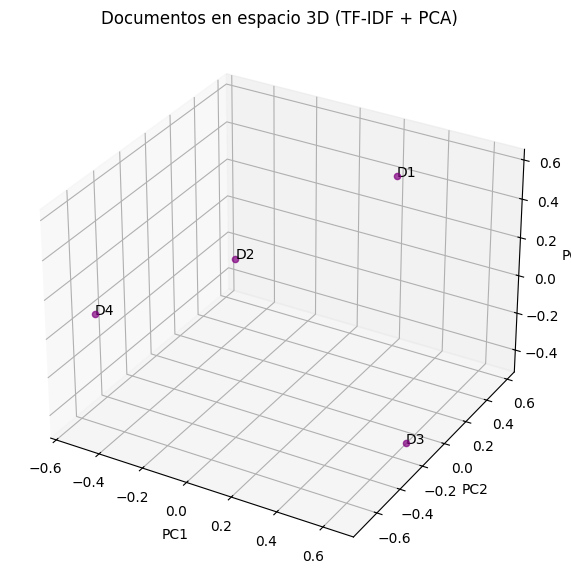

In [91]:
from mpl_toolkits.mplot3d import Axes3D
pca_tfidf_3d = PCA(n_components=3)
docs_tfidf_3d = pca_tfidf_3d.fit_transform(matriz_tfidf)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i, (x, y, z) in enumerate(docs_tfidf_3d):
    ax.scatter(x, y, z, alpha=0.7, color='purple')
    ax.text(x, y, z, f"D{i+1}", size=10)
ax.set_title("Documentos en espacio 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [92]:
consulta = "gato"
print("Consulta ingresada:", consulta)


Consulta ingresada: gato


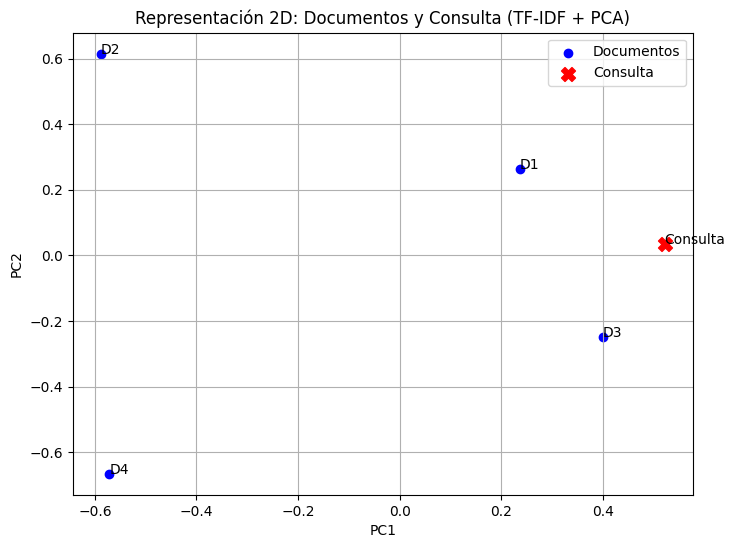

In [96]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

matriz_tfidf_con_consulta = np.vstack([matriz_tfidf, consulta_tfidf])

pca_2d = PCA(n_components=2)
docs_consulta_2d = pca_2d.fit_transform(matriz_tfidf_con_consulta)

plt.figure(figsize=(8, 6))
plt.scatter(docs_consulta_2d[:-1, 0], docs_consulta_2d[:-1, 1], label='Documentos', color='blue')
plt.scatter(docs_consulta_2d[-1, 0], docs_consulta_2d[-1, 1], label='Consulta', color='red', marker='X', s=100)

for i in range(len(documents)):
    plt.annotate(f"D{i+1}", (docs_consulta_2d[i, 0], docs_consulta_2d[i, 1]))
plt.annotate("Consulta", (docs_consulta_2d[-1, 0], docs_consulta_2d[-1, 1]))

plt.title("Representación 2D: Documentos y Consulta (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.legend()
plt.show()


In [97]:
from sklearn.metrics.pairwise import cosine_similarity
similitudes = cosine_similarity(consulta_tfidf, matriz_tfidf)[0]
for i, score in enumerate(similitudes):
    print(f"Similitud con Documento {i+1}: {score:.4f}")


Similitud con Documento 1: 0.3148
Similitud con Documento 2: 0.0000
Similitud con Documento 3: 0.2514
Similitud con Documento 4: 0.0000


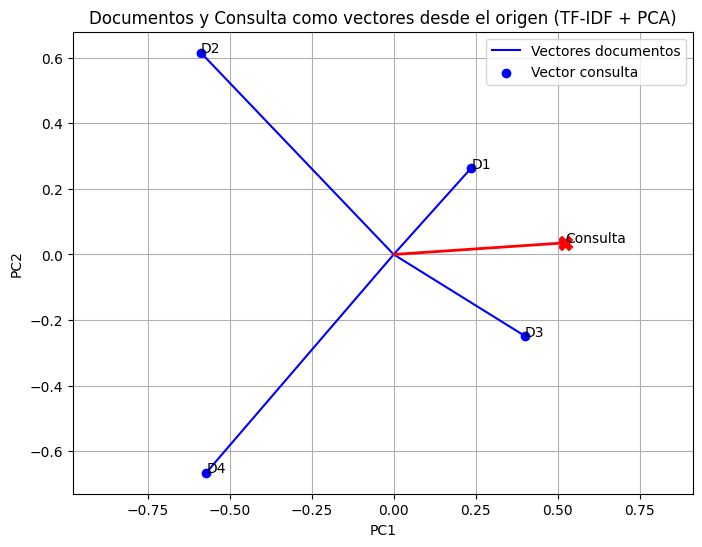

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

matriz_tfidf_con_consulta = np.vstack([matriz_tfidf, consulta_tfidf])
pca_2d = PCA(n_components=2)
docs_consulta_2d = pca_2d.fit_transform(matriz_tfidf_con_consulta)

plt.figure(figsize=(8, 6))

for i in range(len(documents)):
    x, y = docs_consulta_2d[i]
    plt.plot([0, x], [0, y], color='blue', linewidth=1.5)
    plt.scatter(x, y, color='blue')
    plt.annotate(f"D{i+1}", (x, y))

x_c, y_c = docs_consulta_2d[-1]
plt.plot([0, x_c], [0, y_c], color='red', linewidth=2)
plt.scatter(x_c, y_c, color='red', marker='X', s=100)
plt.annotate("Consulta", (x_c, y_c))

plt.title("Documentos y Consulta como vectores desde el origen (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.axis('equal')
plt.legend(["Vectores documentos", "Vector consulta"])
plt.show()


## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

In [102]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def rankear_documentos_por_similitud(consulta, vectorizador, documentos):
    consulta_vec = vectorizador.transform([consulta]).toarray()
    matriz_doc = vectorizador.transform(documentos).toarray()
    similitudes = cosine_similarity(consulta_vec, matriz_doc)[0]
    ranking = sorted(enumerate(similitudes), key=lambda x: x[1], reverse=True)
    return ranking, consulta_vec, matriz_doc


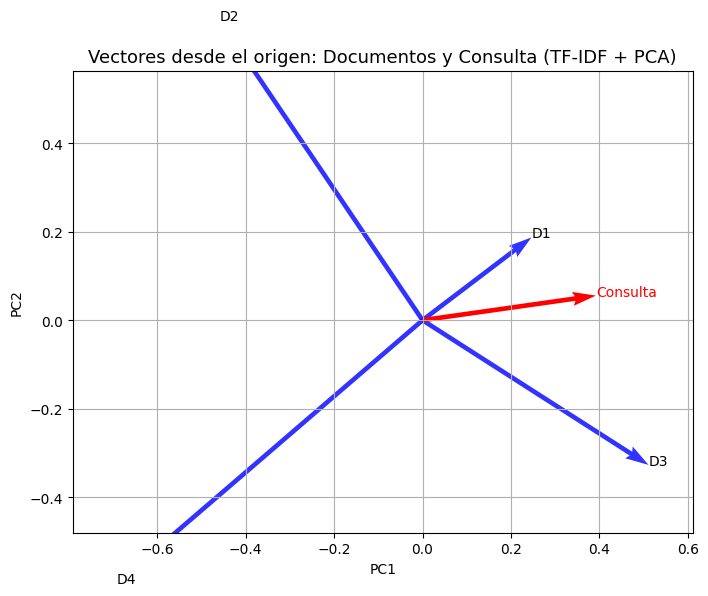

Ranking de documentos según similitud coseno con la consulta:
Documento 3: similitud = 0.6145
Documento 1: similitud = 0.5016
Documento 2: similitud = 0.2834
Documento 4: similitud = 0.1004


In [105]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

consulta_texto = "el gato en la cama"
ranking, consulta_vec, matriz_doc = rankear_documentos_por_similitud(consulta_texto, vectorizador, documents)

matriz_completa = np.vstack([matriz_doc, consulta_vec])
pca = PCA(n_components=2)
matriz_2d = pca.fit_transform(matriz_completa)

origen_x = np.zeros(matriz_2d.shape[0])
origen_y = np.zeros(matriz_2d.shape[0])
destino_x = matriz_2d[:, 0]
destino_y = matriz_2d[:, 1]

plt.figure(figsize=(8, 6))

for i in range(len(documents)):
    plt.quiver(0, 0, destino_x[i], destino_y[i],
               angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.8)
    plt.text(destino_x[i], destino_y[i], f"D{i+1}", fontsize=10)

plt.quiver(0, 0, destino_x[-1], destino_y[-1],
           angles='xy', scale_units='xy', scale=1, color='red', linewidth=2)
plt.text(destino_x[-1], destino_y[-1], "Consulta", fontsize=10, color='red')

plt.title("Vectores desde el origen: Documentos y Consulta (TF-IDF + PCA)", fontsize=13)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.axis('equal')

margin = 0.1
x_min, x_max = destino_x.min(), destino_x.max()
y_min, y_max = destino_y.min(), destino_y.max()
plt.xlim(x_min - margin, x_max + margin)
plt.ylim(y_min - margin, y_max + margin)

plt.show()

print("Ranking de documentos según similitud coseno con la consulta:")
for idx, score in ranking:
    print(f"Documento {idx+1}: similitud = {score:.4f}")
